# Dimensionality reduction analysis

## Read data

In [1]:
import pandas as pd
import psycopg2

# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'sepsis_micro'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

dataQuery = """select * from sepsis_micro.data_matrix_qc_1;"""
dataDf = pd.read_sql_query(dataQuery, con)
dataDf

,micro_specimen_id,person_id,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality,Ambulatory Clinic / Center,...,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last,time_to_antibiotic
0,2940,-470494077,0,0,0,1,1,1,1,0,...,-0.586379,2.441041,-0.053360,-0.804726,0.726778,-0.800329,0.048541,-0.857543,-0.077536,0.018778
1,3236,-762840899,0,1,1,1,1,1,1,0,...,-0.942367,-0.066982,1.677597,-1.840315,0.615396,-1.745000,0.621905,-1.037712,0.988716,0.018778
2,3720,-1481508426,0,0,0,0,0,0,0,0,...,-0.535524,-0.345652,-1.438125,-1.692373,1.376502,-0.989263,1.004149,-0.377094,-0.290787,0.022081
3,5214,2090709572,0,0,0,0,0,0,0,0,...,-0.789801,-0.554654,0.292832,-0.508844,-0.164272,-1.745000,-1.098189,-0.677375,-0.504037,-1.107961
4,10611,-961491032,0,0,0,0,0,0,0,0,...,1.091850,-0.763656,-0.399551,1.414391,0.763905,0.333277,-0.333703,0.043300,-0.859455,0.034054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,9986222,-1199717531,0,0,0,0,0,0,0,0,...,1.447838,-0.554654,0.465927,-0.065021,-0.498416,0.900080,2.533121,-0.377094,-0.575121,0.017126
7098,9989349,-1246337626,0,0,0,0,0,0,0,0,...,1.244416,1.953370,-0.399551,-1.248550,1.357938,-1.745000,-0.715946,0.463693,1.841718,0.031577
7099,9989996,-1704051650,1,1,1,1,1,1,1,0,...,-1.247500,-0.693988,0.119736,0.082921,-0.758306,-1.178197,-0.907067,-1.337993,-0.646204,0.018778
7100,9996881,768076701,0,0,1,1,1,1,1,0,...,-0.586379,-0.833323,-0.572647,-0.656785,-0.609797,0.144343,2.150878,-0.437150,-0.788371,0.031990


## Format data

In [2]:
dropCols = [
    'micro_specimen_id',
    'person_id',
    'seven_day_mortality',
    'fourteen_day_mortality',
    'twentyone_day_mortality',
    'twentyeight_day_mortality',
    'sixty_day_mortality',
    'ninety_day_mortality',
    'onetwenty_day_mortality',
    'Ambulatory Clinic / Center',
    'Ambulatory Surgical Center',
    'Emergency Room - Hospital',
    'Emergency Room and Inpatient Visit',
    'Inpatient Visit',
    'Observation Room',
    'AMBULATORY OBSERVATION',
    'DIRECT EMER.',
    'ELECTIVE',
    'EU OBSERVATION',
    'EW EMER.',
    'OBSERVATION ADMIT',
    'SURGICAL SAME DAY ADMISSION',
    'URGENT',
    'AMBULATORY SURGERY TRANSFER',
    'CLINIC REFERRAL',
    'EMERGENCY ROOM',
    'INFORMATION NOT AVAILABLE',
    'INTERNAL TRANSFER TO OR FROM PSYCH',
    'PACU',
    'PHYSICIAN REFERRAL',
    'PROCEDURE SITE',
    'TRANSFER FROM HOSPITAL',
    'TRANSFER FROM SKILLED NURSING FACILITY',
    'WALK-IN/SELF REFERRAL',
]

X = dataDf.drop(dropCols, axis = 1)
XVitalsMax = dataDf[['temp_max', 'heartrate_max', 'breath_rate_vent_max', 'breath_rate_spon_max', 'resp_rate_max', 'oxygen_max', 'sysbp_max', 'diabp_max', 'meanbp_max', 'sysbp_ni_max', 'diabp_ni_max', 'meanbp_ni_max', 'gcs_motor_max', 'gcs_verbal_max', 'gcs_eye_max']]
XVitalsMin = dataDf[['temp_min', 'heartrate_min', 'breath_rate_vent_min', 'breath_rate_spon_min', 'resp_rate_min', 'oxygen_min', 'sysbp_min', 'diabp_min', 'meanbp_min', 'sysbp_ni_min', 'diabp_ni_min', 'meanbp_ni_min', 'gcs_motor_min', 'gcs_verbal_min', 'gcs_eye_min']]
XVitalsAvg = dataDf[['temp_avg', 'heartrate_avg', 'breath_rate_vent_avg', 'breath_rate_spon_avg', 'resp_rate_avg', 'oxygen_avg', 'sysbp_avg', 'diabp_avg', 'meanbp_avg', 'sysbp_ni_avg', 'diabp_ni_avg', 'meanbp_ni_avg', 'gcs_motor_avg', 'gcs_verbal_avg', 'gcs_eye_avg']]
XVitalsSd = dataDf[['temp_sd', 'heartrate_sd', 'breath_rate_vent_sd', 'breath_rate_spon_sd', 'resp_rate_sd', 'oxygen_sd', 'sysbp_sd', 'diabp_sd', 'meanbp_sd', 'sysbp_ni_sd', 'diabp_ni_sd', 'meanbp_ni_sd', 'gcs_motor_sd', 'gcs_verbal_sd', 'gcs_eye_sd']]
XVitalsFirst = dataDf[['temp_first', 'heartrate_first', 'breath_rate_vent_first', 'breath_rate_spon_first', 'resp_rate_first', 'oxygen_first', 'sysbp_first', 'diabp_first', 'meanbp_first', 'sysbp_ni_first', 'diabp_ni_first', 'meanbp_ni_first', 'gcs_motor_first', 'gcs_verbal_first', 'gcs_eye_first']]
XVitalsLast = dataDf[['temp_last', 'heartrate_last', 'breath_rate_vent_last', 'breath_rate_spon_last', 'resp_rate_last', 'oxygen_last', 'sysbp_last', 'diabp_last', 'meanbp_last', 'sysbp_ni_last', 'diabp_ni_last', 'meanbp_ni_last', 'gcs_motor_last', 'gcs_verbal_last', 'gcs_eye_last']]
XLabsMax = dataDf[['potassium_max', 'chloride_max', 'glucose_max', 'sodium_max', 'bicarbonate_max', 'hemoglobin_max', 'creatinine_max']]
XLabsMin = dataDf[['potassium_min', 'chloride_min', 'glucose_min', 'sodium_min', 'bicarbonate_min', 'hemoglobin_min', 'creatinine_min']]
XLabsAvg = dataDf[['potassium_avg', 'chloride_avg', 'glucose_avg', 'sodium_avg', 'bicarbonate_avg', 'hemoglobin_avg', 'creatinine_avg']]
XLabsSd = dataDf[['potassium_sd', 'chloride_sd', 'glucose_sd', 'sodium_sd', 'bicarbonate_sd', 'hemoglobin_sd', 'creatinine_sd']]
XLabsFirst = dataDf[['potassium_first', 'chloride_first', 'glucose_first', 'sodium_first', 'bicarbonate_first', 'hemoglobin_first', 'creatinine_first']]
XLabsLast = dataDf[['potassium_last', 'chloride_last', 'glucose_last', 'sodium_last', 'bicarbonate_last', 'hemoglobin_last', 'creatinine_last']]
ySevenDay = dataDf['seven_day_mortality']

In [ ]:
X.shape, XVitalsMax.shape, XVitalsMin.shape, XVitalsAvg.shape, XVitalsSd.shape, XVitalsFirst.shape, XVitalsLast.shape, XLabsMax.shape, XLabsMin.shape, XLabsAvg.shape, XLabsSd.shape, XLabsFirst.shape, XLabsLast.shape, ySevenDay.shape

## t-SNE plot for all features

In [22]:
from sklearn.manifold import TSNE

XTsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [23]:
import pandas as pd

tsneDf = pd.DataFrame(XTsne, columns = ['x', 'y'])
tsneDf['label'] = ySevenDay.to_list()

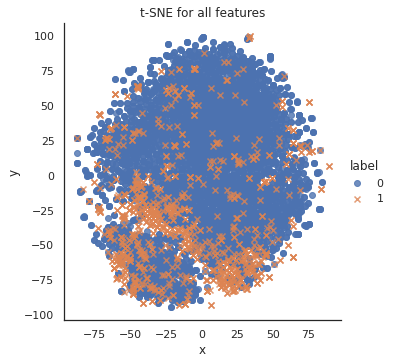

In [24]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.lmplot(x="x", y="y", data=tsneDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='t-SNE for all features')

## PCA for all features

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X)

In [27]:
import pandas as pd

pcaDf = pd.DataFrame(pca, columns = ['x', 'y'])
pcaDf['label'] = ySevenDay.to_list()

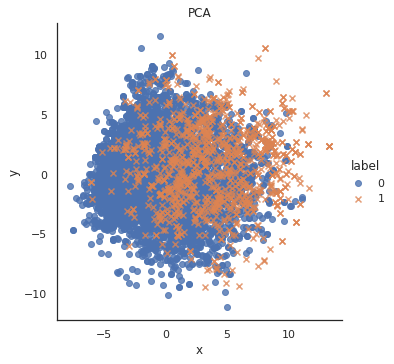

In [28]:
import seaborn as sns
import pandas as pd

sns.set(style="white", color_codes=True)
sns.lmplot( x="x", y="y", data=pcaDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='PCA')

## First level models

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
xgbParameters={
    'max_depth': [6, 9, 12],
    'scale_pos_weight': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
}

xgbGrid = GridSearchCV(XGBClassifier(use_label_encoder=False, verbosity=0), xgbParameters)
xgbGrid.fit(XVitalsMax, ySevenDay)

xgbParams = xgbGrid.cv_results_['params'][list(xgbGrid.cv_results_['rank_test_score']).index(1)]
xgbParams

In [ ]:
lrParameters={
    'solver': ['newton-cg', 'liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01],
}

lrGrid = GridSearchCV(LogisticRegression(), lrParameters)
lrGrid.fit(XVitalsMax, ySevenDay)

lrParams = lrGrid.cv_results_['params'][list(lrGrid.cv_results_['rank_test_score']).index(1)]
lrParams

In [ ]:
XDict = {
    'VitalsMax': (XVitalsMaxTrain, XVitalsMaxTest),
    'VitalsMin': (XVitalsMinTrain, XVitalsMinTest),
    'VitalsAvg': (XVitalsAvgTrain, XVitalsAvgTest),
    'VitalsSd': (XVitalsSdTrain, XVitalsSdTest),
    'VitalsFirst': (XVitalsFirstTrain, XVitalsFirstTest),
    'VitalsLast': (XVitalsLastTrain, XVitalsLastTest),
    'LabsMax': (XLabsMaxTrain, XLabsMaxTest),
    'LabsMin': (XLabsMinTrain, XLabsMinTest),
    'LabsAvg': (XLabsAvgTrain, XLabsAvgTest),
    'LabsSd': (XLabsSdTrain, XLabsSdTest),
    'LabsFirst': (XLabsFirstTrain, XLabsFirstTest),
    'LabsLast': (XLabsLastTrain, XLabsLastTest),
}

probsDict = {}

for label, (XTrain, XTest) in XDict.items():

    xgb = XGBClassifier(use_label_encoder=False)
    xgb.set_params(**xgbParams)
    xgb.fit(XTrain, ySevenDayTrain)

    xgbProbs = [p2 for p1, p2 in xgb.predict_proba(XTest)]

    probsDict[('XGB', label)] = xgbProbs

    lr = LogisticRegression()
    lr.set_params(**lrParams)
    lr.fit(XTrain, ySevenDayTrain)

    lrProbs = [p2 for p1, p2 in lr.predict_proba(XTest)]

    probsDict[('LR', label)] = lrProbs

    lgbm = LGBMClassifier()
    lgbm.set_params(**xgbParams)
    lgbm.fit(XTrain, ySevenDayTrain)

    lgbmProbs = [p2 for p1, p2 in lgbm.predict_proba(XTest)]

    probsDict[('LGBM', label)] = lgbmProbs

    mlp = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (200, 200))
    mlp.fit(XTrain, ySevenDayTrain)

    mlpProbs = [p2 for p1, p2 in mlp.predict_proba(XTest)]

    probsDict[('MLP', label)] = mlpProbs

In [ ]:
import pandas as pd

Xnew = pd.DataFrame()

for key, value in probsDict.items():
    Xnew[key[0] + '_' + key[1]] = value

Xnew

In [ ]:
from sklearn.manifold import TSNE

XTsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(Xnew)

In [3]:
from sklearn.manifold import TSNE

XTsneVitalsLast = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(XVitalsLast)
XTsneLabsMin = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(XLabsMin)
XTsneLabsLast = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(XLabsLast)

In [ ]:
import pandas as pd

tsneDf = pd.DataFrame(XTsne, columns = ['x', 'y'])
tsneDf['label'] = ySevenDayTest.to_list()

In [ ]:
import seaborn as sns
import pandas as pd

sns.set(style="white", color_codes=True)
sns.lmplot( x="x", y="y", data=tsneDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='t-SNE')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(Xnew)

In [ ]:
import pandas as pd

pcaDf = pd.DataFrame(pca, columns = ['x', 'y'])
pcaDf['label'] = ySevenDayTest.to_list()

In [ ]:
import seaborn as sns
import pandas as pd

sns.set(style="white", color_codes=True)
sns.lmplot( x="x", y="y", data=pcaDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='PCA')

## XGBoost

In [29]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={
    'max_depth': [6, 9, 12],
    'scale_pos_weight': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
}

clf = GridSearchCV(XGBClassifier(use_label_encoder=False), parameters)
clf.fit(X, ySevenDay)

params = clf.cv_results_['params'][list(clf.cv_results_['rank_test_score']).index(1)]
params

In [11]:
import numpy as np
import pandas as pd

XTsne = np.concatenate((XTsneVitalsLast, XTsneLabsMin, XTsneLabsLast))
XTsne = np.column_stack((XTsne, np.asarray(['vitals_last'] * len(XTsneVitalsLast) + ['labs_min'] * len(XTsneLabsMin) + ['labs_last'] * len(XTsneLabsLast))))

tsneDf = pd.DataFrame(XTsne, columns = ['x', 'y', 'type'])
tsneDf['label'] = ySevenDay.to_list() + ySevenDay.to_list() + ySevenDay.to_list()

In [15]:
import numpy as np
import pandas as pd

XTsne = np.concatenate((XTsneVitalsLast, XTsneLabsMin, XTsneLabsLast), axis = 1)

tsneDf = pd.DataFrame(XTsne, columns = ['x_vitals_last', 'y_vitals_last', 'x_labs_min', 'y_labs_min', 'x_labs_last', 'y_labs_last'])
tsneDf['label'] = ySevenDay.to_list()

In [16]:
# tsneDf[tsneDf['type'] == 'vitals_last']
tsneDf

,x_vitals_last,y_vitals_last,x_labs_min,y_labs_min,x_labs_last,y_labs_last,label
0,27.762354,31.416904,-6.131349,26.781715,-4.088115,45.109112,0
1,15.566619,57.457268,-17.446751,31.788046,-17.475828,53.434807,0
2,-9.062641,-48.266464,10.663095,39.875317,48.953960,38.889297,0
3,-5.687253,-17.729486,-26.554163,11.410141,-13.765061,25.580500,0
4,43.188957,45.717621,65.739441,-25.511930,-21.974356,-49.383705,0
...,...,...,...,...,...,...,...
7097,41.216404,-50.097153,33.928486,-28.007877,54.657154,14.230354,0
7098,-26.911497,-6.798169,-47.235401,43.035004,-21.280342,81.262451,0
7099,13.772307,-26.916422,-15.306602,-0.757797,-16.214281,13.906473,1
7100,-25.067190,42.680622,11.754946,23.636694,63.319252,21.027325,0


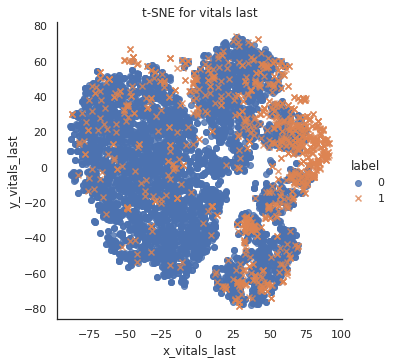

In [19]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.lmplot(x="x_vitals_last", y="y_vitals_last", data=tsneDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='t-SNE for vitals last')

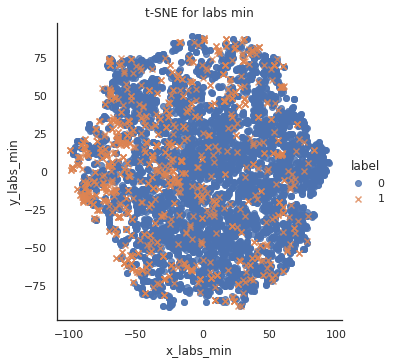

In [20]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.lmplot(x="x_labs_min", y="y_labs_min", data=tsneDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='t-SNE for labs min')

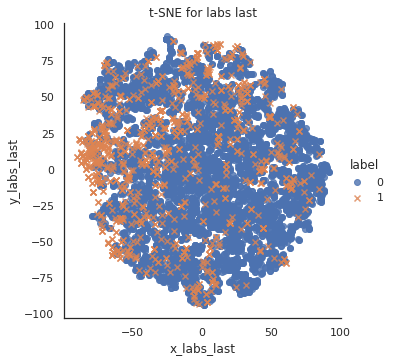

In [21]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.lmplot(x="x_labs_last", y="y_labs_last", data=tsneDf, fit_reg=False, hue='label', markers=['o', 'x']).set(title='t-SNE for labs last')